In [ ]:
"""
1) import libraries & loading the dataset
2) understanding & preparing the dataset
3) EDA => corr, plotting
4) preprocessing data => independent & dependent features, train test split, standardization of data, linear regression algo
5) checking performance & metrics
6) adding new data points, pickling the model for deployment

"""

1) import libraries & loading the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

2) understanding & preparing the dataset

In [3]:
print("the keys are: ", diabetes.keys())
print("the feature names are :   ", diabetes.feature_names, "\n")

print("this is the frame key: ", diabetes.frame)
print("this is the data filename: ", diabetes.data_filename)
print("this is the target filename: ", diabetes.target_filename)

print("\nthe shape of data is: ", diabetes.data.shape)
print("the target shape is: ", diabetes.target.shape , "\n")


print("the data is: \n", diabetes.data , "\n\n")
print("the target is: \n", diabetes.target , "\n")

the keys are:  dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
the feature names are :    ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 

this is the frame key:  None
this is the data filename:  c:\Users\shiva\anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_data.csv.gz
this is the target filename:  c:\Users\shiva\anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_target.csv.gz

the shape of data is:  (442, 10)
the target shape is:  (442,) 

the data is: 
 [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ..

In [4]:
print("the discription is: ", diabetes.DESCR , "\n\n")

the discription is:  .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level



In [5]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
diabetes_df["target"] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
print("the info for the dataset is: \n"); diabetes_df.info() # checking for null values
print("\n\nthe features with null values: \n", diabetes_df.isnull().sum()) # checking for null values
print("\nthe stats for the dataset is: "); diabetes_df.describe() # only numerical is concidered

the info for the dataset is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


the features with null values: 
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

the stats for the dataset is: 


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


3) EDA

In [8]:
# correlations: a good regression model will have high negitive corr or high positive corr
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Text(0, 0.5, 'target')

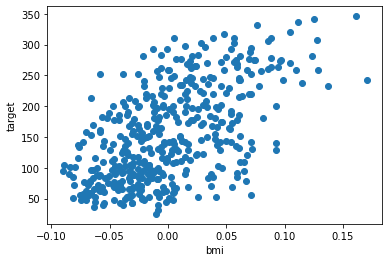

In [9]:
# sns.pairplot(housing_df)
plt.scatter(diabetes_df["bmi"], diabetes_df["target"])
plt.xlabel("bmi"); plt.ylabel("target")

Text(0, 0.5, 'target')

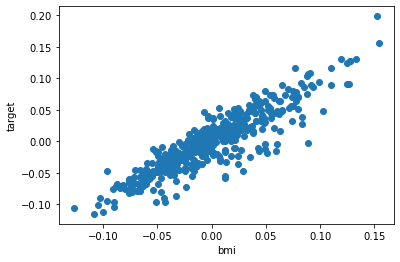

In [10]:
plt.scatter(diabetes_df["s1"], diabetes_df["s2"])
plt.xlabel("bmi"); plt.ylabel("target")

<AxesSubplot:xlabel='s1', ylabel='s2'>

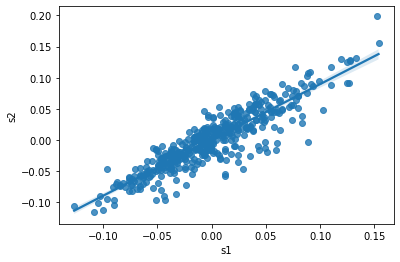

In [11]:
sns.regplot(x="s1", y="s2", data=diabetes_df)

<AxesSubplot:xlabel='bmi', ylabel='target'>

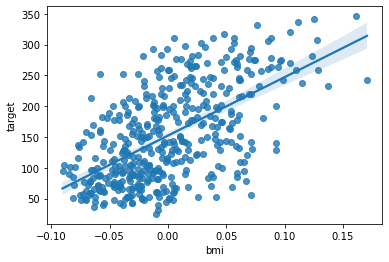

In [12]:
sns.regplot(x="bmi", y="target", data=diabetes_df)

4) preprocessing data & training data

In [13]:
# indpendent & dependent feature
independent = diabetes_df.iloc[:, :-1]
dependent = diabetes_df.iloc[:, -1]
print("independent features: \n",independent.head())
print("\n\n dependdent features: \n", dependent.head())

independent features: 
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


 dependdent features: 
 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [14]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=0)

In [15]:
print("the below is x_train: \n", x_train.head())

the below is x_train: 
           age       sex       bmi        bp        s1        s2        s3  \
74   0.012648  0.050680  0.002417  0.056301  0.027326  0.017162  0.041277   
26  -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
45   0.027178  0.050680 -0.035307  0.032201 -0.011201  0.001504 -0.010266   
389 -0.005515  0.050680  0.001339 -0.084857 -0.011201 -0.016658  0.048640   
154  0.067136  0.050680  0.020739 -0.005671  0.020446  0.026243 -0.002903   

           s4        s5        s6  
74  -0.039493  0.003712  0.073480  
26  -0.076395 -0.042572 -0.005220  
45  -0.002592 -0.014956 -0.050783  
389 -0.039493 -0.041180 -0.088062  
154 -0.002592  0.008640  0.003064  


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
print("the train dataset after transformation is: \n", x_train)
x_test = scaler.transform(x_test)
print("\nthe train dataset after transformation is: \n", x_test)

the train dataset after transformation is: 
 [[ 0.24396182  1.02582922  0.06364526 ... -0.83072415  0.07515871
   1.49297091]
 [-2.23157066 -0.97482113 -1.56789685 ... -1.59866429 -0.86974251
  -0.10202047]
 [ 0.54402637  1.02582922 -0.70803006 ... -0.062784   -0.30595955
  -1.02543653]
 ...
 [ 1.21917159 -0.97482113 -0.4214078  ...  1.47309629  1.61466743
   2.75217463]
 [-1.63144158 -0.97482113 -1.47970538 ... -0.83072415 -0.37050867
  -1.69701185]
 [ 0.84409091  1.02582922  1.4747087  ...  0.70515614  1.49807525
   1.74481165]]

the train dataset after transformation is: 
 [[ 3.93994097e-01  1.02582922e+00  2.15819255e+00  1.50345572e+00
  -7.52733711e-01 -5.47858545e-01 -5.24991337e-01 -6.27840018e-02
   7.51587071e-02  8.21395589e-01]
 [-2.81151127e-01 -9.74821134e-01  1.25423004e+00  1.13755978e+00
   1.02882432e+00  6.42627136e-01 -3.68963602e-01  7.05156145e-01
   1.43277102e+00  1.49820273e-01]
 [ 7.69074777e-01  1.02582922e+00  1.95932455e-01  9.18022210e-01
  -8.98763058e-01

In [17]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)
regress_predict = regression.predict(x_test)

print("the coefficients: ", regression.coef_)
print("\nthe intercepts: ", regression.intercept_)
print("\nthe parameters: ", regression.get_params())
print("\nthe prediction of test data: ", regress_predict)

the coefficients:  [ -1.72178392 -11.5858913   27.51028594  14.37158187 -31.2253899
  15.26838048   1.16951132   8.18473783  35.83959262   2.12310979]

the intercepts:  151.60623229461757

the parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}

the prediction of test data:  [238.47145247 248.93170646 164.05404165 120.30794355 187.42422054
 259.04865002 113.55556372 188.07597044 149.49663441 236.01099949
 172.24629506 178.88073764 109.15751983  92.13508975 243.33042043
  87.356971   155.72606406  66.99073989 100.42610442 218.09422877
 196.66287912 161.29832968 161.70779605 156.52520454 197.88796516
 167.57984206 120.74478913  84.83879727 192.03728687 160.60687024
 175.17178362  84.22833237 145.7995542  145.97333493 140.96488953
 197.00421108 165.94322494 190.65906468 128.22520508 206.41941223
  84.35851196 164.0256504  144.1056776  184.68355549 177.80238966
  74.32855231 143.3660286  138.67726085 120.81146113 234.34252077
 161.943

5) checking performance & metrics

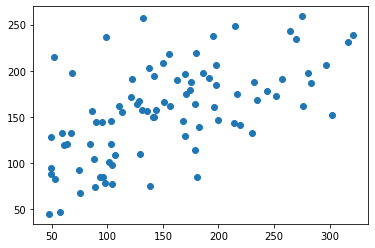

In [18]:
plt.scatter(y_test, regress_predict)

the residuals are: 
 362    82.528548
249   -33.931706
271   -37.054042
435   -56.307944
400   -12.424221
         ...    
381    27.226223
213   -45.940469
134   -42.295505
49    -52.037764
52    -73.785343
Name: target, Length: 89, dtype: float64


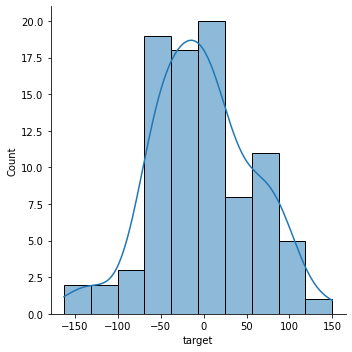

In [19]:
residuals = y_test - regress_predict
print("the residuals are: \n", residuals)
sns.displot(residuals, kde=True)

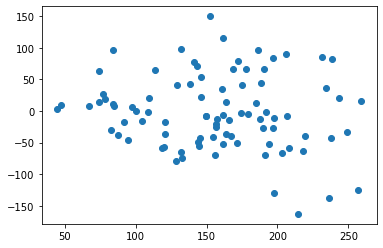

In [20]:
plt.scatter(regress_predict, residuals)  # uniform distribution

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("the mean abosolute error is: ", mean_absolute_error(y_test, regress_predict))
print("the mean sqaured error is: ", mean_squared_error(y_test, regress_predict))
print("the root mean sqaured error is: ", np.sqrt(mean_squared_error(y_test, regress_predict)))

score = r2_score(y_test, regress_predict)
print("\nthe r^2 error is: ", score)
score_adjusted = 1 - (1-score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1] - 1)
print("the adjusted r^2 error  is: ", score_adjusted)

the mean abosolute error is:  46.17420241875422
the mean sqaured error is:  3424.316688213735
the root mean sqaured error is:  58.5176613358201

the r^2 error is:  0.3322220326906513
the adjusted r^2 error  is:  0.24660947277919631


In [22]:
# prediction on the basis of new dataset
print("this is the values in the dataset: ", diabetes.data[0])
print("\nthis is the shape of the values of a feature: ", diabetes.data[0].shape, " we need a 2d array") 

reshaped_data = diabetes.data[0].reshape(1,-1)
print("\nthis is the new values in the dataset: ", reshaped_data)
print("\nthis is the shape of the new values: ", reshaped_data.shape)

scaled_data = scaler.transform(reshaped_data)
print("\n\nthe scaled data is: ", scaled_data)
print("\nprediction: ", regression.predict(scaled_data))

this is the values in the dataset:  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

this is the shape of the values of a feature:  (10,)  we need a 2d array

this is the new values in the dataset:  [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]]

this is the shape of the new values:  (1, 10)


the scaled data is:  [[ 0.76907478  1.02582922  1.2762779   0.47894708 -0.92796893 -0.72077825
  -0.91506067 -0.062784    0.40581978 -0.35386122]]

prediction:  [210.571063]


In [23]:
# pickling model for deployment
import pickle
pickle.dump(regression, open("regression.pkl", "wb"))
pickled_model = pickle.load(open("regression.pkl", "rb"))